<h1>Survey Neighborhoods in Tokyo for Business Opportunities (Part-2)</h1>
Sectioning Airbnb Neighborhoods in Tokyo: Survey the Surroundings for promising Business Venue<br>
Analysing FourSquare categories  : Find out a prospective Plan.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
0.  <a href="#item1">Introduction: Business Idea and Tools</a>

1.  <a href="#item1">Tokyo AirBnB data : section and survey</a>

2.  <a href="#item2">Plot neighbourhoods in terms of listings and Price</a>

3.  <a href="#item3">Scrape and wrangle the Population Dataset from wikipagee and merge</a>

4.  <a href="#item4">Explore the Neighborhoods: Olympic Statdium and business consideration.</a>
    
5.  <a href="#item5">Analyze the Neighborhoods' Restaurant and Bars : Business on Indian cuisines.</a>
  
6.  <a href="#item6">Summary</a>  
    </font>
    </div>

## 0.  <a id="item0">Introduction: Business Idea and Tools</a>

<h2>Project Idea: Key issues</h2>

<ul>
    <li>1: Due to COVID-spread, Tokyo Olympic 2020 is postponed, and the new date is set at the end of July 2021. A huge number of tourists is expected to be flooded in the airbnb hotels, shooping streets, restaurants, bars.</li>
    <li>2: Population of greater Tokyo is close to 40 Milions (To be precise, 38.14 Millions as of today), and it creates a potential cosumer market. Any survey on restaurant/food/bevrage business deserves merits for a study.
 </ul>
 The above Key issues set forth the mission of the project with the following project works.
 <ul>
    <li>1: Sectioning Airbnb Neighborhoods in Tokyo: Survey the Surroundings around Airbnb hotels.</li>
    <li>2: Count and compare the number of restaurant, bars on cusine and categories</li>
    <li>3: Find a potential location for investment on Restaurant Business with specific set of cuisines.<br>
</ul>

<h3>Executve summary </h3>
It appears that the shopping streets around Shimokitazawa station at Setagaya-ku will be attracting a significant number of visitors. First and foremost, the average airBnB price is affordable while the location is only a few kilometers away from the main venue of Tokyo Olympic. Second, the area has the highest population in Tokyo, which will support the continual growth of any new business to maintain the demand and supply chain. Hence, the business opportunity can be made scalable to sustain the growth after the olympic is over.

<h3>Getting Started</h3>
Foursquare API provides a range of tools for developers to incorporate the up-to-date location data to enhance their projects.
To start using Foursquare, a free acount provides a limited set of tools, which is resonably alright to proof my concept for the course assignment. 
To start coding, first and foremost, import some necessary libraries: pandas.json(to tranforming json file into a pandas dataframe library), folium (plotting library), geopy.geocoders (module to convert an address into latitude and longitude values), and requests (library to handle http requests).

In [1]:
# Import libraries and packages

#library list for airbnb data analysis
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import json
import geojson
import folium
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import TimestampedGeoJson
import datetime
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt

#libraries for webpage scraping
import requests
from bs4 import BeautifulSoup

#libraries to convert address to latitude and longitudes
from geopy.geocoders import Nominatim 

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas import json_normalize

%matplotlib inline
#!python --version #Python 3.7.8

## 1.  <a id="item1">Tokyo AirBnB data : section and survey</a>

The open dataset Inside Airbnb databases allows grabbing only the necessary data for the analysis.

In [25]:
# Import listings data, load as pandas dataframe
listings_data = pd.read_csv('listings_june2020.csv')
# Import reviews data, load as a pandas dataframe
reviews_data = pd.read_csv('reviews_june2020.csv')
# Load the geojson file required for mapping as a geodataframe
tokyo_geo = gpd.GeoDataFrame.from_file('neighbourhoods_june2020.geojson')

<h2>data Preparation</h2>

Aggregate the data to find out the number of listings, average price, and latitude/longitude coordinate of each neighborhood. Next, in order for a more quantitative analysis, BeautifulSoup scraping tools is applied on the Special Wards of Tokyo Wikipedia page containing population and area data of the city’s administrative 23 wards.

In [3]:
#listings_data.columns
listings=listings_data[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4163,28,18,2018-07-28,0.17,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10993,3,165,2020-03-04,1.55,1,300
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4163,28,113,2020-02-17,1.16,2,165
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66443,139.65707,Entire home/apt,7044,28,103,2020-04-16,1.35,3,361
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3949,28,104,2020-05-12,1.11,2,353


## 2.  <a id="item2">Plot top neighbourhoods in terms listings and Price</a>

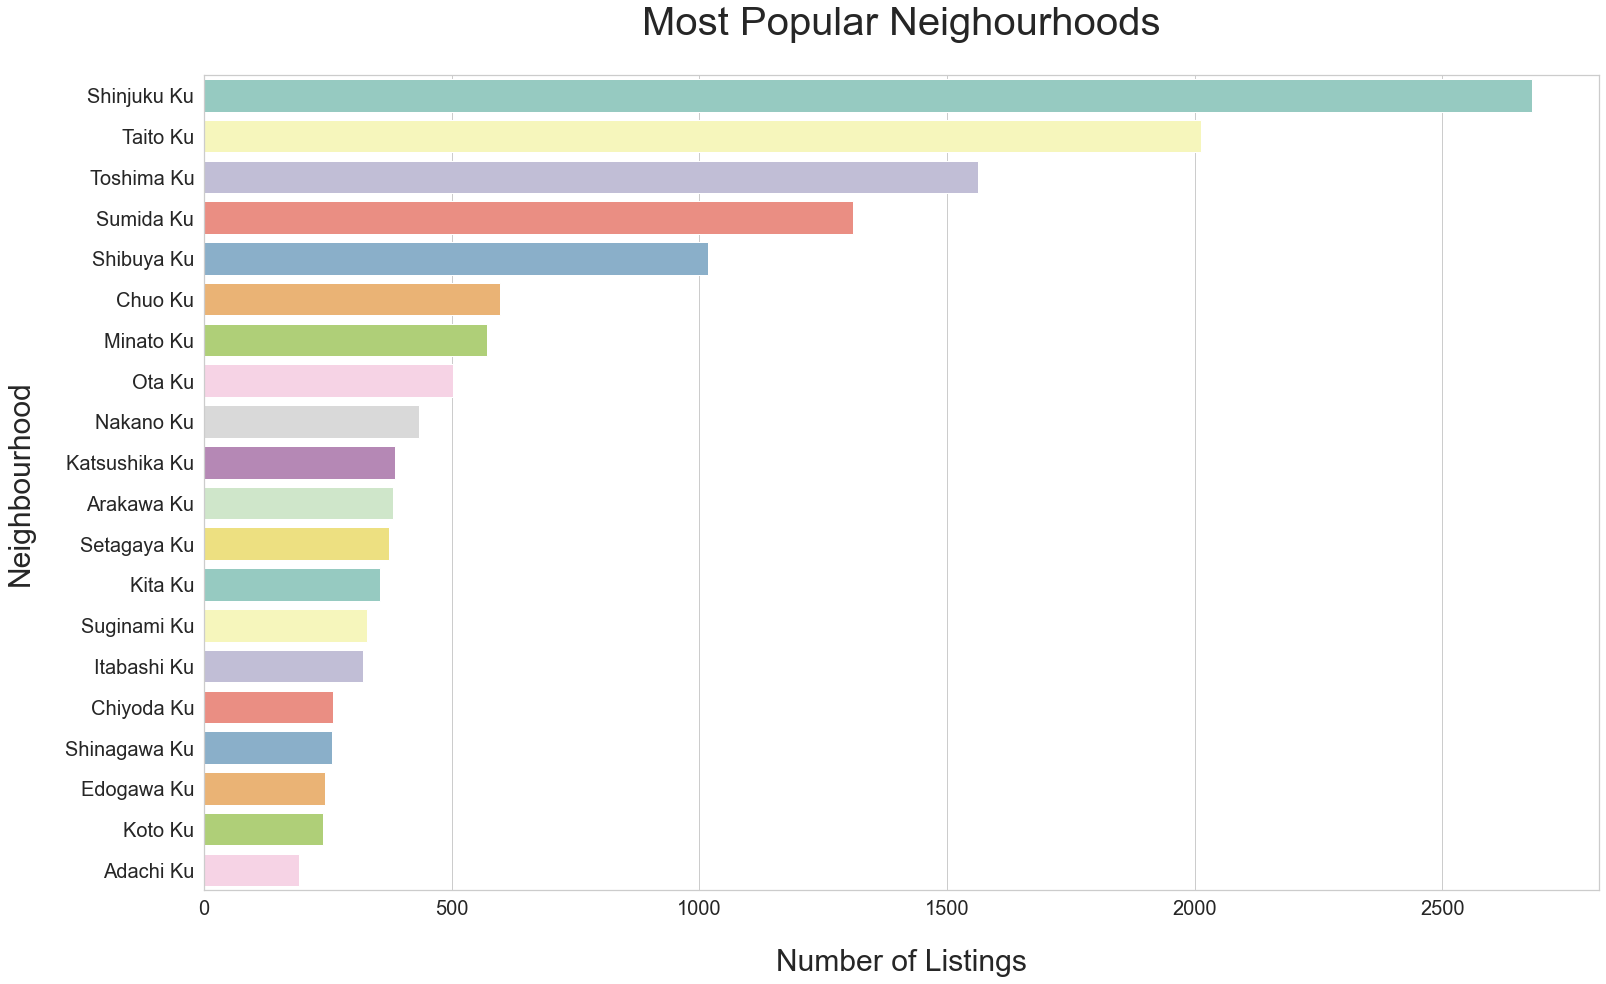

In [4]:
# Plot top 20 neighbourhoods in terms listings
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Most Popular Neighourhoods",fontsize=40,pad=40)
ax = sns.countplot(y='neighbourhood',data=listings, order = listings['neighbourhood'].value_counts().iloc[:20].index, palette="Set3")
ax.set_xlabel('Number of Listings',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [5]:
# Create a list of top 20 neighbourhoords in terms of listings
top = listings['neighbourhood'].value_counts().iloc[:20].index.tolist()
# Create a dataframe to group neighbourhoods by average room price
price = pd.DataFrame(listings.groupby(['neighbourhood']).price.mean().reset_index())
# Create a dataframe to filter top 20 neighbourhoods
top_price = price[price['neighbourhood'].isin(top)].sort_values('price',ascending=False)

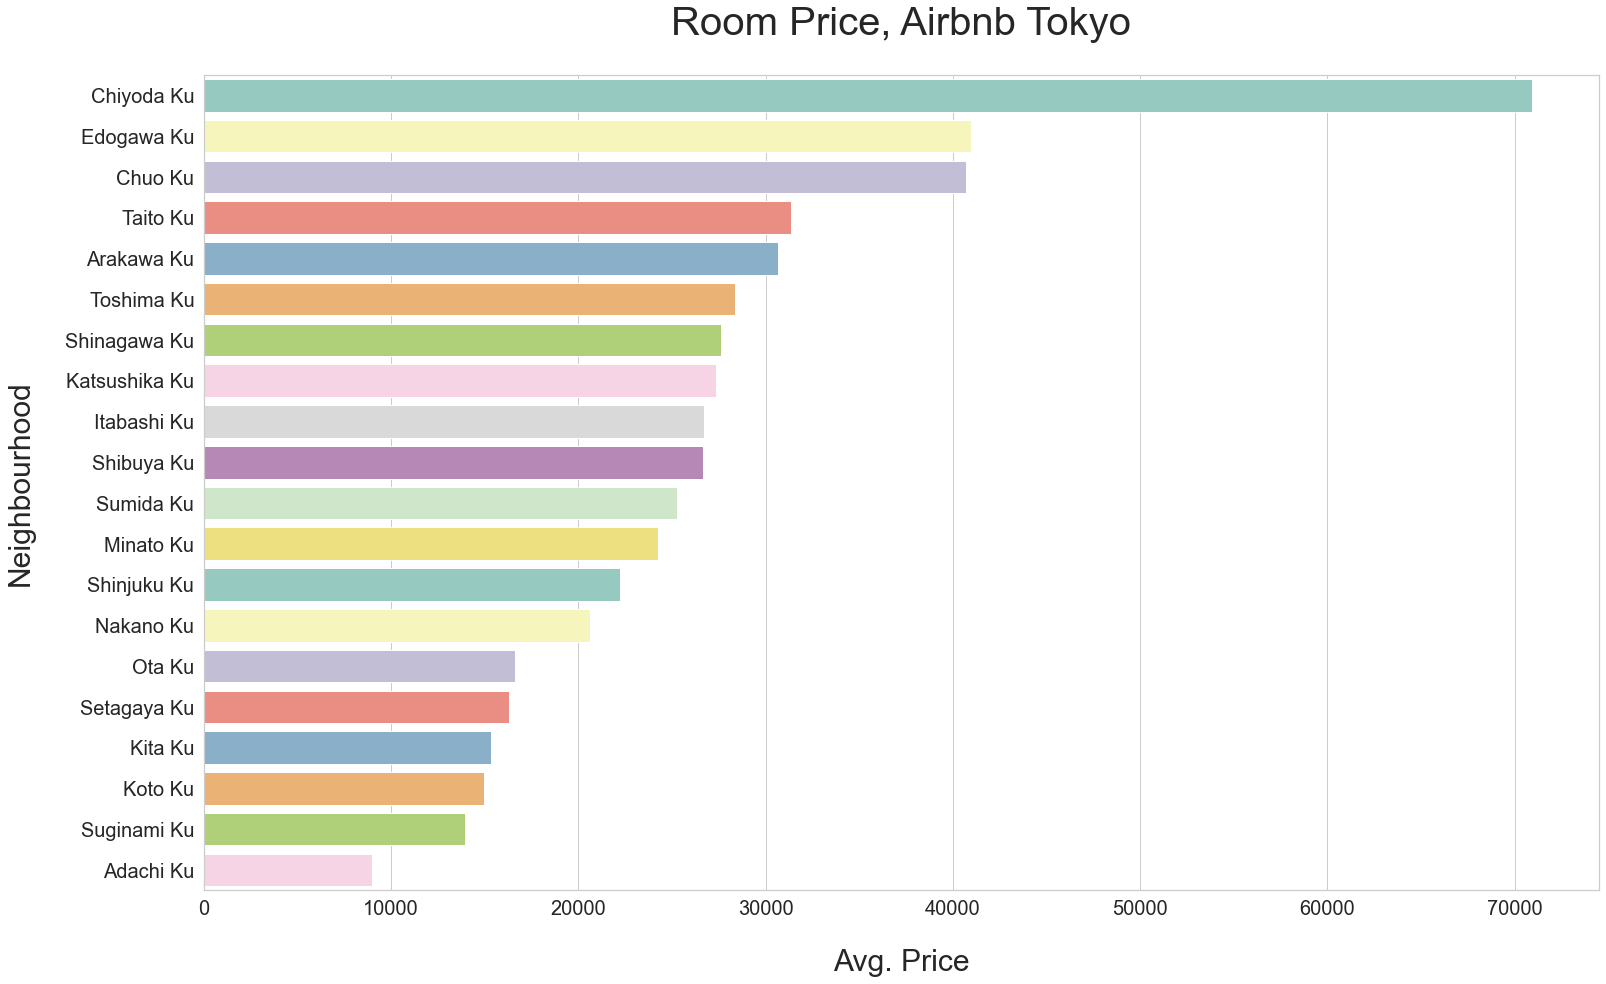

In [6]:
# Barplot of price by neighbourhood, top 20 neighbourhoods in terms of listings
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Room Price, Airbnb Tokyo",fontsize=40, pad=40)
ax = sns.barplot(x='price', y='neighbourhood',data=top_price, palette='Set3')
ax.set_xlabel('Avg. Price',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [7]:
# Keeping the 23 Administrative wards "Ku"
tokyo_geo=tokyo_geo[tokyo_geo["neighbourhood"].str.contains(" Ku")]
tokyo_geo.drop(columns=['neighbourhood_group'],inplace=True)
tokyo_geo = tokyo_geo.sort_values(by=['neighbourhood']).reset_index(drop=True)

Data prep for choropleth maps

In [8]:
# Create new dataframe for listings grouped by neighbourhood
listings_geo = pd.DataFrame(listings.groupby(['neighbourhood']).id.count()).reset_index()
price_geo = pd.DataFrame(listings.groupby(['neighbourhood']).price.mean()).reset_index()
# Rename column in neighbourhood_cleansed dataframe
listings_geo.rename(columns={'id':'listings'}, inplace=True)
price_geo.rename(columns={'id':'price'}, inplace=True)
# Merge listings, price and ratings with geo
tokyo_geo = tokyo_geo.merge(listings_geo, on='neighbourhood')
tokyo_geo = tokyo_geo.merge(price_geo, on='neighbourhood')
tokyo_geo.head()

,neighbourhood,geometry,listings,price
0,Adachi Ku,"MULTIPOLYGON (((139.75560 35.81273, 139.76120 ...",193,8981.761658
1,Arakawa Ku,"MULTIPOLYGON (((139.81450 35.73873, 139.80980 ...",381,30647.795276
2,Bunkyo Ku,"MULTIPOLYGON (((139.76109 35.73213, 139.76241 ...",153,24607.915033
3,Chiyoda Ku,"MULTIPOLYGON (((139.77010 35.70526, 139.77310 ...",260,70955.011538
4,Chuo Ku,"MULTIPOLYGON (((139.78889 35.69466, 139.79040 ...",598,40699.277592


Plot Central Tokyo with the Tokyo Olympic Statdium marked
Japan National Stadium/Coordinates
35.6779° N, 139.7145° E

In [9]:
# Plot the data, Listings Choropleth
#gplt.polyplot(tokyo_geo, projection=gcrs.PlateCarree())

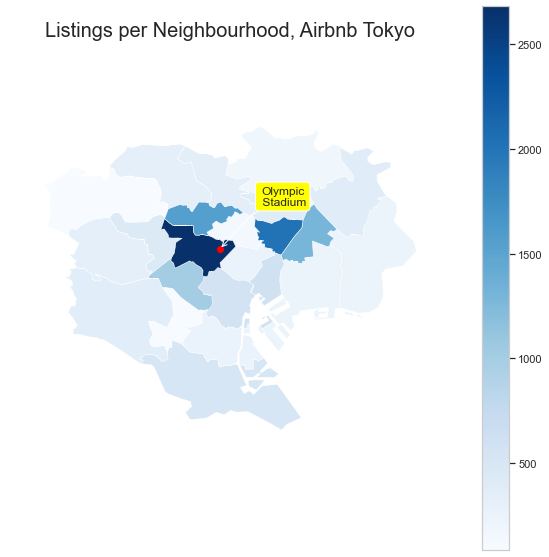

In [10]:
# Plot the data, Listings Choropleth
ax=gplt.choropleth(tokyo_geo, hue=tokyo_geo['listings'], projection=gcrs.PlateCarree(),
                cmap='Blues', linewidth=0.5, edgecolor='white', legend=True, figsize=(10, 10))
plt.title("Listings per Neighbourhood, Airbnb Tokyo", fontsize=20, pad=60)
plt.savefig("airbnb_listings_suburb.png", bbox_inches='tight', pad_inches=0.1)
Long_stadium, Lat_stadium = 139.7145, 35.6779 
#plt.text(0,35.68,'Here is the stadium')
x1,y1=-0.01,35.70
x2,y2 =0.05,35.75
ax.annotate("Olympic\n Stadium",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            ha="center", va="center",
            bbox=dict(boxstyle="round", fc="yellow", ),
            arrowprops=dict(arrowstyle="->", relpos=(0., 0.))
            )
ax.plot([x1, x2], [y1, y2], "o",color='red')

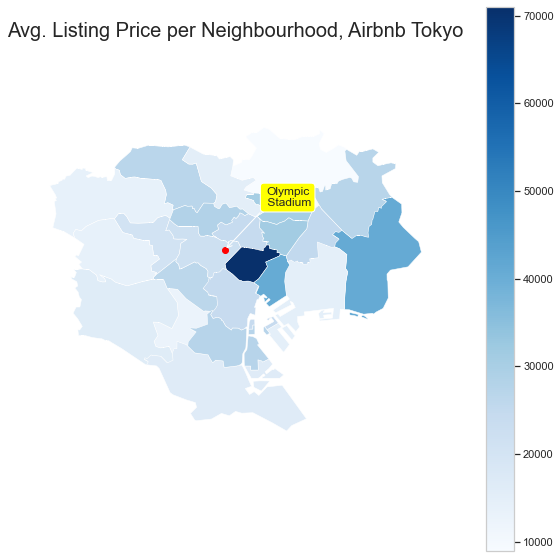

In [11]:
# Plot the data, Avg. Listing Price Choropleth

ax=gplt.choropleth(tokyo_geo, hue=tokyo_geo['price'], projection=gcrs.PlateCarree(),
                cmap='Blues', linewidth=0.5, edgecolor='white', legend=True, figsize=(10, 10))
plt.title("Avg. Listing Price per Neighbourhood, Airbnb Tokyo", fontsize=20, pad=60)
plt.savefig("airbnb_price_suburb.png", bbox_inches='tight', pad_inches=0.1)
x1,y1=-0.01,35.70
x2,y2 =0.05,35.75
ax.annotate("Olympic\n Stadium",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            ha="center", va="center",
            bbox=dict(boxstyle="round", fc="yellow", ),
            arrowprops=dict(arrowstyle="->", relpos=(0., 0.))
            )
ax.plot([x1, x2], [y1, y2], "o",color='red')

Prepping the data again

In [12]:
tokyo_geo.head()

,neighbourhood,geometry,listings,price
0,Adachi Ku,"MULTIPOLYGON (((139.75560 35.81273, 139.76120 ...",193,8981.761658
1,Arakawa Ku,"MULTIPOLYGON (((139.81450 35.73873, 139.80980 ...",381,30647.795276
2,Bunkyo Ku,"MULTIPOLYGON (((139.76109 35.73213, 139.76241 ...",153,24607.915033
3,Chiyoda Ku,"MULTIPOLYGON (((139.77010 35.70526, 139.77310 ...",260,70955.011538
4,Chuo Ku,"MULTIPOLYGON (((139.78889 35.69466, 139.79040 ...",598,40699.277592


## 3. <a id="item3">Scrape and wrangle the Population Dataset from wikipage and merge</a>

BeautifulSoup scraping tool is applied on the Special Wards of Tokyo Wikipedia page containing population and area data of the city’s administrative 23 wards.

In [13]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo').text
soup = BeautifulSoup(response_obj,'lxml')
tokyo_table = soup.find('table', {'class':'wikitable sortable'})

In [14]:
df = pd.DataFrame(columns=['No.', 'Flag', 'Neighborhood', 'Kanji',
                           'Population', 'Density', 'Area_km2', 'Major'])

for row in tokyo_table.findAll("tr"):
    rows = []
    for cell in row.find_all('td'):
        rows.append(cell.text.lstrip('0').replace('\n',''))
    if len(rows) == 8:
        df.loc[len(df)] = rows
#df.head()

In [15]:
df['Population'] = df['Population'].str.replace(',','')
df['Area_km2'] = df['Area_km2'].astype(float)
df = df.sort_values(by=['Neighborhood'])[['Neighborhood','Population','Area_km2']].reset_index(drop=True)

In [16]:
# Merge listings, price 
tokyo_merged_df = tokyo_geo.merge(df, left_index=True, right_index=True)
tokyo_merged_df.head()

,neighbourhood,geometry,listings,price,Neighborhood,Population,Area_km2
0,Adachi Ku,"MULTIPOLYGON (((139.75560 35.81273, 139.76120 ...",193,8981.761658,Adachi,674067,53.25
1,Arakawa Ku,"MULTIPOLYGON (((139.81450 35.73873, 139.80980 ...",381,30647.795276,Arakawa,213648,10.16
2,Bunkyo Ku,"MULTIPOLYGON (((139.76109 35.73213, 139.76241 ...",153,24607.915033,Bunkyō,223389,11.29
3,Chiyoda Ku,"MULTIPOLYGON (((139.77010 35.70526, 139.77310 ...",260,70955.011538,Chiyoda,59441,11.66
4,Chuo Ku,"MULTIPOLYGON (((139.78889 35.69466, 139.79040 ...",598,40699.277592,Chūō,147620,10.21


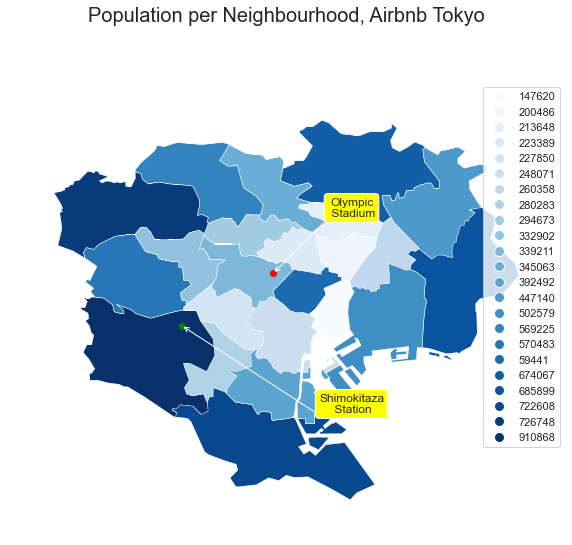

In [17]:
# Plot the data, Population Choropleth

ax=gplt.choropleth(tokyo_merged_df, hue=tokyo_merged_df['Population'], projection=gcrs.PlateCarree(),
                cmap='Blues', linewidth=0.5, edgecolor='white', legend=True, figsize=(10, 10))
plt.title("Population per Neighbourhood, Airbnb Tokyo", fontsize=20, pad=60)
plt.savefig("airbnb_population_suburb.png", bbox_inches='tight', pad_inches=0.1)
x1,y1=-0.01,35.70
x2,y2 =0.05,35.75
ax.annotate("Olympic\n Stadium",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            ha="center", va="center",
            bbox=dict(boxstyle="round", fc="yellow", ),
            arrowprops=dict(arrowstyle="->", relpos=(0., 0.))
            )
ax.plot([x1, x2], [y1, y2], "o",color='red')

x1,y1=-0.08,35.66
x2,y2 =0.05,35.60
ax.annotate("Shimokitaza\n Station",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            ha="center", va="center",
            bbox=dict(boxstyle="round", fc="yellow", ),
            arrowprops=dict(arrowstyle="->", relpos=(0., 0.))
            )
ax.plot([x1, x2], [y1, y2], "o",color='green')

## 4. <a id="item4">Explore the Neighborhoods: Olympic Statdium and business consideration.</a>

#### FOUR factors co consider: number of listings, average price, distance from olympic venue, and high population
It appears that the shooping streets around Shimokitazawa station at Setagaya-ku will be attracting for a significant number of visitors. First and foremost, the average airBnB price is affordable while only a few kilometers away from the main venue of Tokyo Olympic. Second, the area has the highest population in Tokyo, which will support the continual growth of any new business. Hence, the business opportunity can be made scalable to sustain the growth after the olympic is over.. 
So let's start by converting the Shimokitazawa-station's address to its latitude and longitude coordinates.

### Define Foursquare Credentials and Version
(Made this cell hidden while on on Github!)

In [18]:
# The code was removed by Watson Studio for sharing.

In [19]:
#Address of Shimokitazawa-station in Setagaya City
address = '2-12 Kitazawa, Setagaya, Tokyo, Japan'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

35.6634677 139.668154


#### Now, let's assume that it is lunch time, and you are craving for italian or Italian food. So, let's define a query to search for food of your interest within 1000 metres from Shimokitaza station.

#### Define URL

In [20]:
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
results = requests.get(url).json()
'There are {} around restaurants Shimokitazawa station.'.format(len(results['response']['groups'][0]['items']))

'There are 100 around restaurants Shimokitazawa station.'

#### Get relevant part of JSON and transform it into a _pandas_ dataframe

In [21]:
# assign relevant part of JSON to venues
items = results['response']['groups'][0]['items']
# tranform venues into a dataframe
dataframe = json_normalize(items) # flatten JSON

#### Define information of interest and filter dataframe

In [22]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,BALLOND'ESSAI Latte & Art,Coffee Shop,北沢2-30-11,1F,35.663096,139.667637,"[{'label': 'display', 'lat': 35.663096, 'lng':...",62,155-0031,JP,東京,東京都,日本,"[北沢2-30-11 (1F), 世田谷区, 東京都, 155-0031, 日本]",NaN,4fa4d5e3e4b041937578b4eb
1,Mintei (珉亭),Chinese Restaurant,北沢2-8-8,NaN,35.662593,139.669498,"[{'label': 'display', 'lat': 35.662593, 'lng':...",155,155-0031,JP,世田谷区,東京都,日本,"[北沢2-8-8, 世田谷区, 東京都, 155-0031, 日本]",NaN,4ce22652aba88cfa2e9f59d7
2,Nishinba (にしんば),Seafood Restaurant,北沢2-9-20,NaN,35.662266,139.669169,"[{'label': 'display', 'lat': 35.66226632849418...",162,155-0031,JP,世田谷区,東京都,日本,"[北沢2-9-20, 世田谷区, 東京都, 155-0031, 日本]",NaN,4b8b9bc6f964a52033a432e3
3,Ushitora 2 (うしとら 弐号店),Beer Bar,北沢2-9-3,三久ビル 2F,35.662289,139.668810,"[{'label': 'display', 'lat': 35.662289, 'lng':...",144,155-0031,JP,世田谷区,東京都,日本,"[北沢2-9-3 (三久ビル 2F), 世田谷区, 東京都, 155-0031, 日本]",下北沢,4b5a9e12f964a520f5cd28e3
4,Rojiura Curry SAMURAI.,Japanese Curry Restaurant,北沢3-31-14,NaN,35.664722,139.667041,"[{'label': 'display', 'lat': 35.66472170611181...",172,155-0031,JP,世田谷区,東京都,日本,"[北沢3-31-14, 世田谷区, 東京都, 155-0031, 日本]",NaN,53205097498e3d19ad2a7605
5,Little Soul Cafe,Bar,北沢3-20-2,大成ビル 2F,35.663235,139.669307,"[{'label': 'display', 'lat': 35.66323473889825...",107,155-0031,JP,世田谷区,東京都,日本,"[北沢3-20-2 (大成ビル 2F), 世田谷区, 東京都, 155-0031, 日本]",下北沢,4bc727cf0050b7135c19b83b
6,Sankaku (山角),Sake Bar,北沢2-8-12,1F,35.662837,139.669665,"[{'label': 'display', 'lat': 35.662837, 'lng':...",153,155-0031,JP,世田谷区,東京都,日本,"[北沢2-8-12 (1F), 世田谷区, 東京都, 155-0031, 日本]",NaN,50a0dca5e4b0eaa917362ca5
7,中華そば こてつ,Ramen Restaurant,北沢2-39-13,NaN,35.664668,139.666330,"[{'label': 'display', 'lat': 35.66466775601323...",212,155-0031,JP,東京,東京都,日本,"[北沢2-39-13, 世田谷区, 東京都, 155-0031, 日本]",東京都,5791a96638fa7e1b4fe1eb09
8,Magic Spice (マジックスパイス),Japanese Curry Restaurant,北沢1-40-15,NaN,35.662264,139.670731,"[{'label': 'display', 'lat': 35.66226438427364...",268,155-0031,JP,世田谷区,東京都,日本,"[北沢1-40-15, 世田谷区, 東京都, 155-0031, 日本]",NaN,4b5ae635f964a5206bd928e3
9,Shin Taipei (新台北),Taiwanese Restaurant,北沢2-6-5,ルイビル 1F,35.661404,139.668974,"[{'label': 'display', 'lat': 35.661404, 'lng':...",241,155-0031,JP,世田谷区,東京都,日本,"[北沢2-6-5 (ルイビル 1F), 世田谷区, 東京都, 155-0031, 日本]",NaN,4bde87260ee3a593092a31b0


## 5. <a id="item5">Analyze Neighborhoods' Restaurant and Bars : Business on Indian cuisines.</a>

#### Let's visualize these items on the map around our location

Itemize the categories based on countries

Wrapping Python in HTML to draw legend table

In [23]:
# generate map centred around shimokita
venues_map = folium.Map(location=[latitude, longitude], tiles='Stamen Toner', zoom_start=15) 

# add Shimokitazawa-station as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Shimokitazawa Station',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

cat_japanese = ["japanese", "sushi", "ramen","sashimi","udon","soba"]
cat_chinese = ["chinese"]
cat_indian = ["india", "indian", "curry","seafood","veg","masala","spice","tandoori", "tikka","kofta","nan"]
cat_indian += ["italian", "pizza", "spaghetti","Panzenella", "Bruschetta", "Focaccia", "Pasta", "Carbonara", "Margherita","Risotto"]
cat_bar = ["bar","beer","sake","wine"]

count_japanese=0
count_chinese=0
count_italian=0
count_indian=0
count_bar=0
count_other=0

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
   
    if any(x in label.lower() for x in cat_japanese):
        count_japanese += 1
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            fill=True,
            color='red',
            fill_color='red',
            fill_opacity=0.6,
            legend_name = 'Japanese Restaurants',
        ).add_to(venues_map)

    elif any(x in label.lower() for x in cat_chinese):
        count_chinese += 1
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            fill=True,
            color='yellow',
            fill_color='yellow',
            fill_opacity=0.6,
            legend_name = 'Chinese Restaurants',
        ).add_to(venues_map)
    
    elif any(x in label.lower() for x in cat_indian):
        count_indian += 1
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            fill=True,
            color='orange',
            fill_color='orange',
            fill_opacity=0.6,
            legend_name = 'Indian Restaurants',
        ).add_to(venues_map)
        
    elif any(x in label.lower() for x in cat_bar):
        count_bar += 1
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6,
            legend_name = 'Bars',
        ).add_to(venues_map)
        
    else:
        count_other += 1
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            fill=True,
            color='green',
            fill_color='green',
            fill_opacity=0.6,
            legend_name = 'Other Restaurants',
            highlight = True,
        ).add_to(venues_map)  

#Wrapper functions for Python in HTML

count_items = {}
count_items['japanese']=count_japanese
count_items['chinese']= count_chinese 
count_items['indian'] = count_indian
count_items['bar']=count_bar
count_items['other']=count_other
#print(count_items)

legend_html = '''
<div style="position: fixed; top: 5px; right: 50px; width: 120px; height: 130px; z-index:9999; font-size:14px;">
<style>
table, th, td {
  border: 1px solid black;
  border-collapse: collapse;
}
.japanese {height: 10px;width: 10px;background-color: red; border-radius: 50%; display: inline-block;}
.chinese {height: 10px;width: 10px;background-color: yellow; border-radius: 50%; display: inline-block;}
.indian {height: 10px;width: 10px;background-color: orange; border-radius: 50%; display: inline-block;}
.bar {height: 10px;width: 10px;background-color: blue; border-radius: 50%; display: inline-block;}
.others {height: 10px;width: 10px;background-color: green; border-radius: 50%; display: inline-block;}
</style>
'''

legend_table='''
<table style="float:right","background-color:white">
  <tr>    <th>Color</th>                                <th>Cusine</th>        <th>Counts</th></tr>
  <tr>    <td><span class="japanese"></span></td>     <td>Japanese</td>        <td>{japanese}</td>   </tr>
  <tr>    <td><span class="chinese"></span></td>     <td>Chinese</td>    <td>{chinese}</td></tr>
  <tr>    <td><span class="indian"></span></td>     <td>Indian</td>  <td>{indian}</td></tr>
  <tr>    <td><span class="bar"></span></td>    <td>Bar</td> <td>{bar}</td></tr>
  <tr>    <td><span class="others"></span></td>    <td>Others</td> <td>{other}</td></tr>
</table>
</div>
'''
legend_html += legend_table.format(**count_items)
venues_map.get_root().html.add_child(folium.Element(legend_html))
# display map
venues_map


## 6. <a id="item6">Summary</a>

Based on AirBnB data analysis, it appears that the shoping streets around Shimokitazawa station at Setagaya-ku will be attracting  a significant number of visitors. First and foremost, the average airBnB price is affordable while the location is only a few kilometers away from the main venue of Tokyo Olympic. Second, the area has the highest population in Tokyo, which will support the continual growth of any new business. Hence, the business opportunity can be made scalable to sustain the growth after the olympic is over.<br>

Meanwhile, the FourSquare datasets provided key analyses on the specific business. Due to COVID-19 spread and restricted human mobility, neighboring countries of Japan will be comprising the most of the visitors. keeping the scenario in mind and segmenting the food categoires into respective recepies, it appeared that indian cuisine are most popular next to local Japanese cuisine. Therefore, any investment in Indian Restaurant Business seems Promising.  


In this lab, I worked on the following skills.
<br> (1) Scraped table data from a Wikipedia webpage, wrangled and cleaned the data, and plugged them into DataFrame. 
<br> (2) Convereted addresses into their equivalent latitude and longitude values. 
<br> (3) Used the Foursquare API to explore neighborhoods in Tokyo City. 
<br> (4) Used the explore function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. 
<br> (6) Finally, used the Folium library to visualize the neighborhoods in Tokyo City.
<br> (7) Last and not the least, I could successfully include python outputs in HTML which is the output of the legend table in the last map. The codes were very large, and I hope the community can bring a suitable tool.

<br> Thank you very much.